520 PROJECT SURVIVAL ANALYSIS ON TCGA DATA 

In [50]:
# Import the required libraries 
import pandas as pd #package for data analysis 
import numpy as np  #package for scientific computing 
Data = pd.read_csv('MyData.csv')

The clinical data of three cancer subtypes Breast cancer, Ovarian cancer, and Glioblastoma multiforme was taken from https://portal.gdc.cancer.gov/ with the help of http://bioconductor.org/packages/release/bioc/html/RTCGA.html package
in R.

The clinical data was stored in CSV file format and loaded into here.

The clinical data included patietnt's vital status (dead or alive), a times variable that is the days to death or the days followed up and the patient barcode. The disease code was also extracted.

In [51]:
print(Data.head())

   Unnamed: 0  times bcr_patient_barcode  patient.vital_status  \
0           1   3767        TCGA-3C-AAAU                     0   
1           2   3801        TCGA-3C-AALI                     0   
2           3   1228        TCGA-3C-AALJ                     0   
3           4   1217        TCGA-3C-AALK                     0   
4           5    158        TCGA-4H-AAAK                     0   

  admin.disease_code  
0               brca  
1               brca  
2               brca  
3               brca  
4               brca  


The number of patients 
Breast cancer- 1098
Ovarian cancer- 576
Glioblastoma multiforme- 595

In [52]:
#to separate the three cancer types in the CSV file 
#Glioblastoma multiforme (GBM)
gbm = Data[Data['admin.disease_code'].str.contains("gbm")]
Tgbm = gbm['times'] #times variable for GBM
Vgbm = gbm['patient.vital_status'] #patient vital status for GBM
print(gbm.head())

      Unnamed: 0  times bcr_patient_barcode  patient.vital_status  \
1674        1675    279        TCGA-02-0001                     1   
1675        1676    144        TCGA-02-0003                     1   
1676        1677    345        TCGA-02-0004                     1   
1677        1678    558        TCGA-02-0006                     1   
1678        1679    705        TCGA-02-0007                     1   

     admin.disease_code  
1674                gbm  
1675                gbm  
1676                gbm  
1677                gbm  
1678                gbm  


In [53]:
#Ovarian Cancer
ov = Data[Data['admin.disease_code'].str.contains("ov")] 
Tov = ov['times'] #times variable for OV
Vov = ov['patient.vital_status'] #patient vital status variable for OV

In [54]:
#Breast Cancer
brca = Data[Data['admin.disease_code'].str.contains("brca")]
Tbrca = brca['times'] #times variable for BRCA
Vbrca = brca['patient.vital_status'] #patient vital status for BRCA

In [55]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lifelines

grpcio 1.11.0 has requirement protobuf>=3.5.0.post1, but you'll have protobuf 3.4.1 which is incompatible.
pyasn1-modules 0.2.1 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.


In [56]:
#import the required packages
import lifelines #package for survival anaylsis
import matplotlib.pyplot as plt #package for plots

In [57]:
#to estimate the survival using Kaplan-Meier survival curves
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()  

In [58]:
kmf.fit(Tgbm, event_observed=Vgbm)  # fitting times and vital status in Kaplan-Meier

<lifelines.KaplanMeierFitter: fitted with 595 observations, 149 censored>

Text(0.5,1,'Survival function using Kaplan-Meier for GBM')

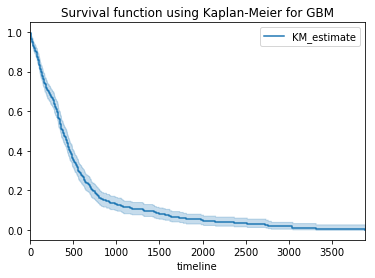

In [59]:
kmf.survival_function_ 
kmf.median_
kmf.plot()
plt.title('Survival function using Kaplan-Meier for GBM')

In [60]:
#side note: for cancer analysis we need to consider the right-censorsed data otherwise
#we are underestimating the true average lifespan.

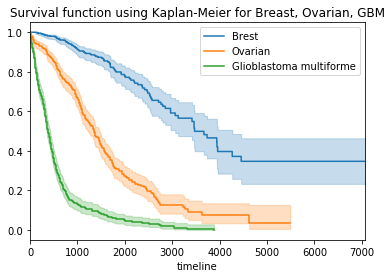

In [61]:
#to estimate the survival using Kaplan-Meier survival curves for
#all the three cancer subtypes
kmf.fit(Tbrca, event_observed=Vbrca, label="Brest")
ax = kmf.plot(loc=slice(0, 10000))
kmf.fit(Tov, event_observed=Vov, label="Ovarian")
kmf.plot(ax=ax, loc=slice(0, 10000))
kmf.fit(Tgbm, event_observed=Vgbm, label="Glioblastoma multiforme")
kmf.plot(ax=ax, loc=slice(0, 10000))
plt.title("Survival function using Kaplan-Meier for Breast, Ovarian, GBM");

We can see that the probability of living after ~4000 days is quite less
There is a high probability to live upto ~500 days
GBM has the lowest survival rate. 
BRAC has the highest survival rate. One of the reasons could be because there are more number of people with BRAC in the study

In [62]:
kmf.fit(Tov, event_observed=Vov)
#just to look at the number of observations for ovarian cancer

<lifelines.KaplanMeierFitter: fitted with 576 observations, 279 censored>

In [63]:
kmf.fit(Tbrca, event_observed=Vbrca)
#just to look at the number of observations for BRCA

<lifelines.KaplanMeierFitter: fitted with 1098 observations, 994 censored>

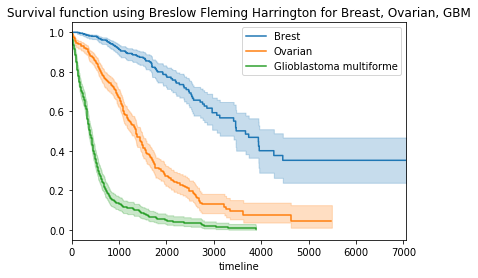

In [64]:
#Another way for viewing the survival function
from lifelines import BreslowFlemingHarringtonFitter


wf = BreslowFlemingHarringtonFitter()
#to estimate the survival using Breslow Fleming Harrington survival curves for
#all the three cancer subtypes
wf.fit(Tbrca, event_observed=Vbrca, label="Brest")
ax = wf.plot(loc=slice(0, 10000))
wf.fit(Tov, event_observed=Vov, label="Ovarian")
wf.plot(ax=ax, loc=slice(0, 10000))
wf.fit(Tgbm, event_observed=Vgbm, label="Glioblastoma multiforme")
wf.plot(ax=ax, loc=slice(0, 10000))
plt.title("Survival function using Breslow Fleming Harrington for Breast, Ovarian, GBM");

The cumulative hazard function is the integral of the hazard function (failure rate). It can be interpreted as the probability of failure at time x given survival until time x

In [65]:
#To estimate hazard rates using Nelson-Aalen
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(Tbrca, event_observed=Vbrca)

<lifelines.NelsonAalenFitter: fitted with 1098 observations, 994 censored>

          NA_estimate
timeline             
-7.0              0.0
 0.0              0.0
 1.0              0.0
 2.0              0.0
 4.0              0.0


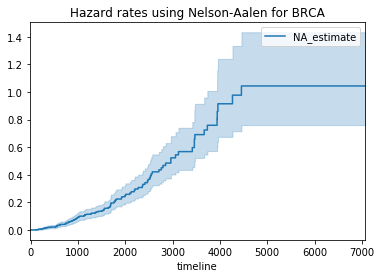

In [66]:
print(naf.cumulative_hazard_.head())
naf.plot()
plt.title("Hazard rates using Nelson-Aalen for BRCA");

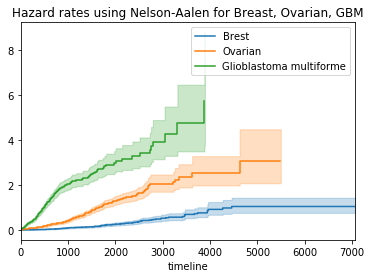

In [67]:
#to estimate the hazard rates using Nelson-Aalen for all the three cancer subtypes
naf.fit(Tbrca, event_observed=Vbrca, label="Brest")
ax = naf.plot(loc=slice(0, 10000))
naf.fit(Tov, event_observed=Vov, label="Ovarian")
naf.plot(ax=ax, loc=slice(0, 10000))
naf.fit(Tgbm, event_observed=Vgbm, label="Glioblastoma multiforme")
naf.plot(ax=ax, loc=slice(0, 10000))
plt.title("Hazard rates using Nelson-Aalen for Breast, Ovarian, GBM");

The rate of change of this curve above is an estimate of the hazard function.
GBM have a much higher constant harzard when compared to Ovarian and BRCA

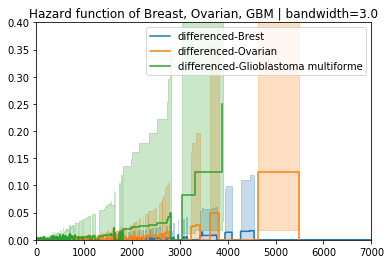

In [68]:
#To smooth out the hazard curve bandwidth can be used
b = 3.
naf.fit(Tbrca, event_observed=Vbrca, label="Brest")
ax = naf.plot_hazard(bandwidth=b)
naf.fit(Tov, event_observed=Vov, label="Ovarian")
naf.plot_hazard(ax=ax, bandwidth=b)
naf.fit(Tgbm, event_observed=Vgbm, label="Glioblastoma multiforme")
naf.plot_hazard(ax=ax, bandwidth=b)
plt.title("Hazard function of Breast, Ovarian, GBM | bandwidth=%.1f"%b);
plt.ylim(0, 0.4)
plt.xlim(0, 7000);

In [69]:
#To get the data suitable for survival regression
gbm_Clinical = gbm.drop('bcr_patient_barcode', 1) #drop bcr_patient_barcode column
gbm_Clinical=gbm_Clinical.ix[:,0:3] 
print(gbm_Clinical.head())

ov_Clinical = ov.drop('bcr_patient_barcode', 1)
ov_Clinical=ov_Clinical.ix[:,0:3]
print(ov_Clinical.head())

BRCA_Clinical = brca.drop('bcr_patient_barcode', 1)
BRCA_Clinical=BRCA_Clinical.ix[:,0:3]
print(BRCA_Clinical.head())

      Unnamed: 0  times  patient.vital_status
1674        1675    279                     1
1675        1676    144                     1
1676        1677    345                     1
1677        1678    558                     1
1678        1679    705                     1
      Unnamed: 0  times  patient.vital_status
1098        1099   1224                     1
1099        1100   1247                     1
1100        1101     55                     1
1101        1102   1495                     0
1102        1103     61                     1
   Unnamed: 0  times  patient.vital_status
0           1   3767                     0
1           2   3801                     0
2           3   1228                     0
3           4   1217                     0
4           5    158                     0


Summary for BRCA
n=1098, number of events=104

             coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95   
Unnamed: 0 0.0004     1.0004    0.0004 1.0893 0.2760     -0.0003      0.0011   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.527
log likelihood -538.8029745780149
score [[0.00092099]]
hessian [[-74.46095884]]
hazards       Unnamed: 0
coef    0.000398
Summary for OV
n=576, number of events=297

             coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95   
Unnamed: 0 0.0005     1.0005    0.0003 1.4506 0.1469     -0.0002      0.0012   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.533
log likelihood -1572.6681431355898
score [[0.00289207]]
hessian [[-301.3927291]]
hazards       Unnamed: 0
coef    0.000502
Summary for GBM
n=595, number of events=446

             coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95   
Unnamed: 0 0.0004     1.0004    0.0003 1.

Text(0.5,1,'coef of GBM')

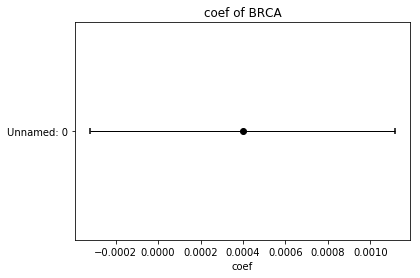

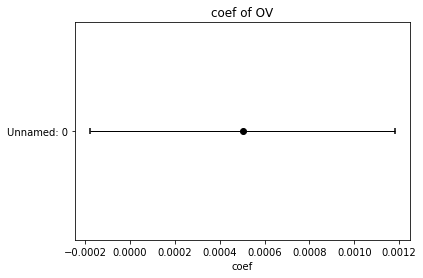

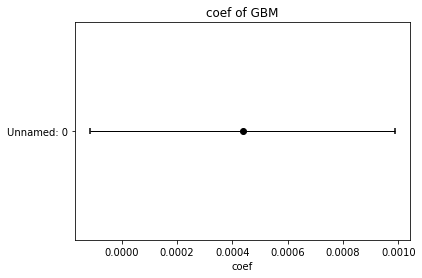

In [70]:
#SURVIVAL REGRESSION
#Cox’s Proportional Hazard model
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(BRCA_Clinical, duration_col='times', event_col='patient.vital_status')
print('Summary for BRCA')
cph.print_summary()  # access the results using 
print('log likelihood',cph._log_likelihood)
print('score',cph._score_)
print('hessian',cph._hessian_)
print('hazards',cph.hazards_)
#plt.plot(cph.baseline_hazard_)
cph.plot() #plots the co-efficients 
plt.title('coef of BRCA')

cph = CoxPHFitter()
cph.fit(ov_Clinical, duration_col='times', event_col='patient.vital_status')
print('Summary for OV')
cph.print_summary()  # access the results using 
print('log likelihood',cph._log_likelihood)
print('score',cph._score_)
print('hessian',cph._hessian_)
print('hazards',cph.hazards_)
cph.plot()
plt.title('coef of OV')

cph = CoxPHFitter()
cph.fit(gbm_Clinical, duration_col='times', event_col='patient.vital_status')
print('Summary for GBM')
cph.print_summary()  # access the results using 
print('log likelihood',cph._log_likelihood)
print('score',cph._score_)
print('hessian',cph._hessian_)
print('hazards',cph.hazards_)
cph.plot()
plt.title('coef of GBM')

From the above summary, we can infer that
The concordance correlation coefficient is almost similar across all the cancer.
The log likihood and score is high for Ovarian cancer.
The regession model did better for Ovarian cancer then BRCA and GBM.

In [71]:
X = BRCA_Clinical.drop(["times", "patient.vital_status"], axis=1)
cph.predict_partial_hazard(X)
cph.predict_survival_function(X)
#To view the predicted survial function for 1098 patients and we can see that the number drops 
#that is because that is how a survival function will be (plotted above using Kaplan-Meier)

,0,1,2,3,4,5,6,7,8,9,...,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097
event_at,,,,,,,,,,,,,,,,,,,,,
0,0.998584,0.998584,0.998583,0.998582,0.998582,0.998581,0.998580,0.998580,0.998579,0.998579,...,0.997724,0.997723,0.997722,0.997721,0.997720,0.997719,0.997718,0.997717,0.997716,0.997715
2,0.998584,0.998584,0.998583,0.998582,0.998582,0.998581,0.998580,0.998580,0.998579,0.998579,...,0.997724,0.997723,0.997722,0.997721,0.997720,0.997719,0.997718,0.997717,0.997716,0.997715
3,0.997160,0.997159,0.997158,0.997156,0.997155,0.997154,0.997153,0.997151,0.997150,0.997149,...,0.995436,0.995434,0.995432,0.995430,0.995428,0.995426,0.995424,0.995422,0.995420,0.995418
4,0.997160,0.997159,0.997158,0.997156,0.997155,0.997154,0.997153,0.997151,0.997150,0.997149,...,0.995436,0.995434,0.995432,0.995430,0.995428,0.995426,0.995424,0.995422,0.995420,0.995418
5,0.995009,0.995007,0.995004,0.995002,0.995000,0.994998,0.994996,0.994994,0.994991,0.994989,...,0.991983,0.991980,0.991977,0.991973,0.991970,0.991966,0.991963,0.991959,0.991956,0.991952
6,0.992851,0.992848,0.992845,0.992842,0.992839,0.992836,0.992833,0.992830,0.992827,0.992823,...,0.988526,0.988521,0.988516,0.988511,0.988506,0.988501,0.988496,0.988491,0.988486,0.988481
7,0.991406,0.991402,0.991398,0.991395,0.991391,0.991387,0.991383,0.991380,0.991376,0.991372,...,0.986212,0.986206,0.986200,0.986194,0.986188,0.986182,0.986176,0.986170,0.986164,0.986158
8,0.989955,0.989951,0.989946,0.989942,0.989937,0.989933,0.989929,0.989924,0.989920,0.989916,...,0.983891,0.983884,0.983877,0.983870,0.983863,0.983856,0.983849,0.983842,0.983835,0.983828
9,0.989228,0.989223,0.989218,0.989214,0.989209,0.989204,0.989200,0.989195,0.989190,0.989186,...,0.982729,0.982722,0.982714,0.982707,0.982699,0.982692,0.982684,0.982677,0.982669,0.982662


In [72]:
#side note: The estimated survival functions of individuals can increase in Aalen’s additive model.
#This is an expected artifact of Aalen’s additive model.
#Thus, Cox’s model was used for regression in this project

In [73]:
from lifelines.utils import k_fold_cross_validation

scores = k_fold_cross_validation(cph, BRCA_Clinical, duration_col='times', event_col='patient.vital_status', k=3)
print('Breast cancer scores',scores)
print('mean of the scores',np.mean(scores))
print('standard deviation of the scores',np.std(scores))

scores = k_fold_cross_validation(cph, gbm_Clinical, duration_col='times', event_col='patient.vital_status', k=3)
print('gbm cancer scores',scores)
print('mean of the scores',np.mean(scores))
print('standard deviation of the scores',np.std(scores))

scores = k_fold_cross_validation(cph, ov_Clinical, duration_col='times', event_col='patient.vital_status', k=3)
print('ovarian cancer scores',scores)
print('mean of the scores',np.mean(scores))
print('standard deviation of the scores',np.std(scores))

Breast cancer scores [0.5652173913043478, 0.4462242562929062, 0.5621731551423591]
mean of the scores 0.524538267579871
standard deviation of the scores 0.055390312729114356
gbm cancer scores [0.5192006002319077, 0.48953068592057764, 0.5254921054461988]
mean of the scores 0.5114077971995613
standard deviation of the scores 0.015681236301179447
ovarian cancer scores [0.5818565896021594, 0.5342666817206729, 0.482878297084683]
mean of the scores 0.5330005228025051
standard deviation of the scores 0.040417636135919026


Like we saw above in the summary, the Ovarian cancer has a higher score.
The predication rates are better for Ovarian cancer.

In [74]:
from lifelines.statistics import logrank_test

results = logrank_test(Tbrca, Tgbm, event_observed_A=Vbrca, event_observed_B=Vgbm)
results.print_summary()
print(results.p_value)      
print(results.test_statistic)


null_distribution=chi squared, t_0=-1, df=1, alpha=0.95

test_statistic      p     
      974.0884 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
7.701903778245064e-214
974.0883520428717


Finally, test statistic is calculated for BRCA and GBM.

For this project http://lifelines.readthedocs.io/en/latest/Quickstart.html was used as reference.